In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

In [30]:
# Cargar el DataFrame desde el archivo Parquet
df = pd.read_parquet('Dataset/Credits_movies_final.parquet')

In [31]:
# Obtener información general del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   budget              45345 non-null  int64  
 1   idMovies            45345 non-null  int64  
 2   original_language   45345 non-null  object 
 3   overview            45345 non-null  object 
 4   popularity          45345 non-null  float64
 5   release_date        45345 non-null  object 
 6   revenue             45345 non-null  float64
 7   runtime             45345 non-null  float64
 8   status              45345 non-null  object 
 9   tagline             45345 non-null  object 
 10  title               45345 non-null  object 
 11  vote_average        45345 non-null  float64
 12  vote_count          45345 non-null  float64
 13  idColeccion         45345 non-null  int64  
 14  nombreColeccion     45345 non-null  object 
 15  idGenero            45345 non-null  int64  
 16  gene

In [32]:
# Obtener estadísticas descriptivas para las columnas numéricas
print(df.describe())


             budget       idMovies    popularity       revenue       runtime  \
count  4.534500e+04   45345.000000  45345.000000  4.534500e+04  45345.000000   
mean   4.232673e+06  108035.740479      2.926248  1.123390e+07     93.668960   
std    1.744391e+07  112180.079341      6.011023  6.441058e+07     38.863177   
min    0.000000e+00       2.000000      0.000000  0.000000e+00      0.000000   
25%    0.000000e+00   26390.000000      0.388826  0.000000e+00     85.000000   
50%    0.000000e+00   59852.000000      1.130269  0.000000e+00     95.000000   
75%    0.000000e+00  156597.000000      3.689610  0.000000e+00    107.000000   
max    3.800000e+08  469172.000000    547.488298  2.787965e+09   1256.000000   

       vote_average    vote_count    idColeccion      idGenero  idProduccion  \
count  45345.000000  45345.000000   45345.000000  45345.000000  45345.000000   
mean       5.624320    110.137722   18211.569170   2153.067835  12996.286162   
std        1.915178    491.904428   707

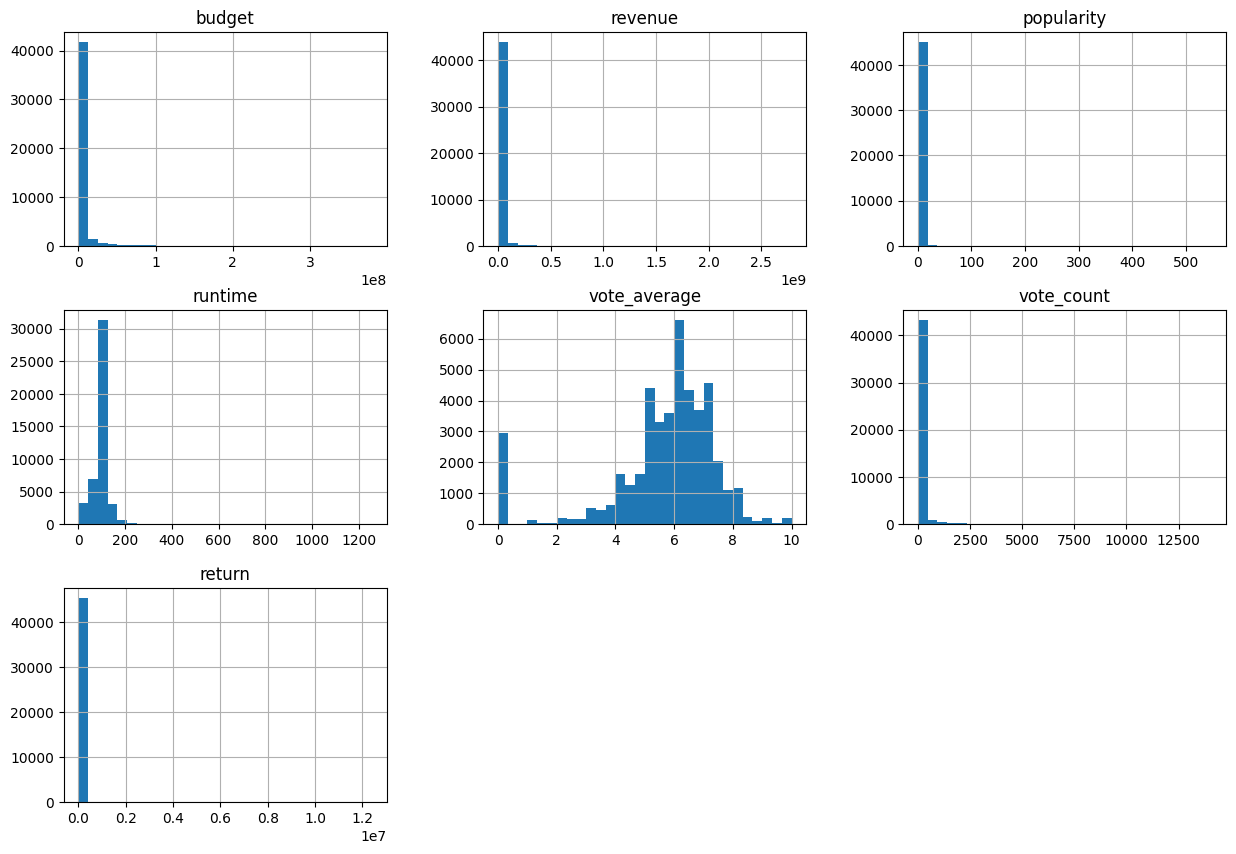

In [11]:
# Distribución de variables numéricas
numerical_columns = ['budget', 'revenue', 'popularity', 'runtime', 'vote_average', 'vote_count', 'return']
df[numerical_columns].hist(bins=30, figsize=(15, 10))
plt.show()

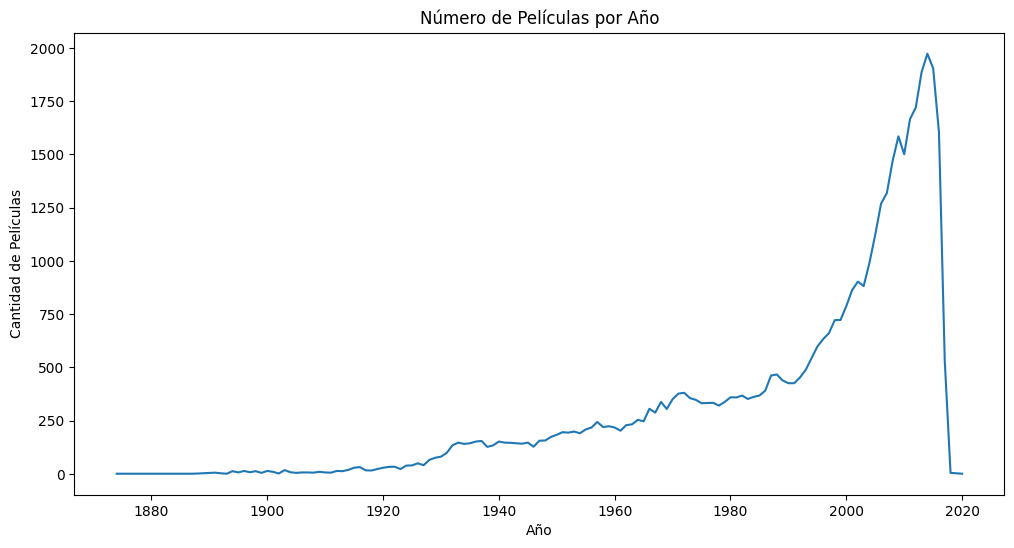

In [12]:
# Convertir 'release_date' a datetime si aún no está en formato datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Agrupar por año y contar el número de películas
df['release_year'] = df['release_date'].dt.year
df.groupby('release_year').size().plot(kind='line', figsize=(12, 6))
plt.title('Número de Películas por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Películas')
plt.show()



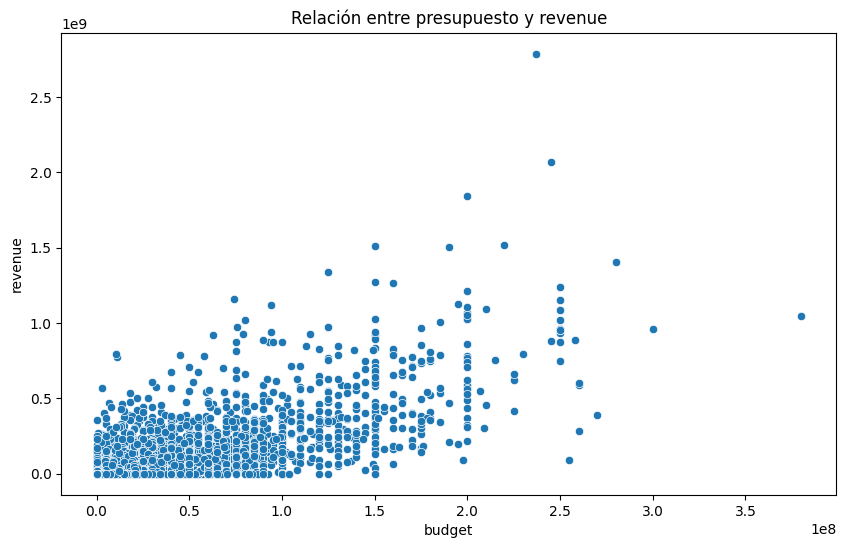

In [33]:
# Gráfico de dispersión entre budget y revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title("Relación entre presupuesto y revenue")
plt.show()

otros analisis

•	Análisis del éxito de actores: Relaciona los actores con el éxito de las películas en las que han participado (por ejemplo, el retorno de inversión o la popularidad).
Ejemplo: ¿Cuáles son los actores que generan más ingresos promedio por película?


C:\Users\evely\AppData\Local\Temp\ipykernel_4112\128575017.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='return', y='NameActor', data=top_actors, palette='viridis')


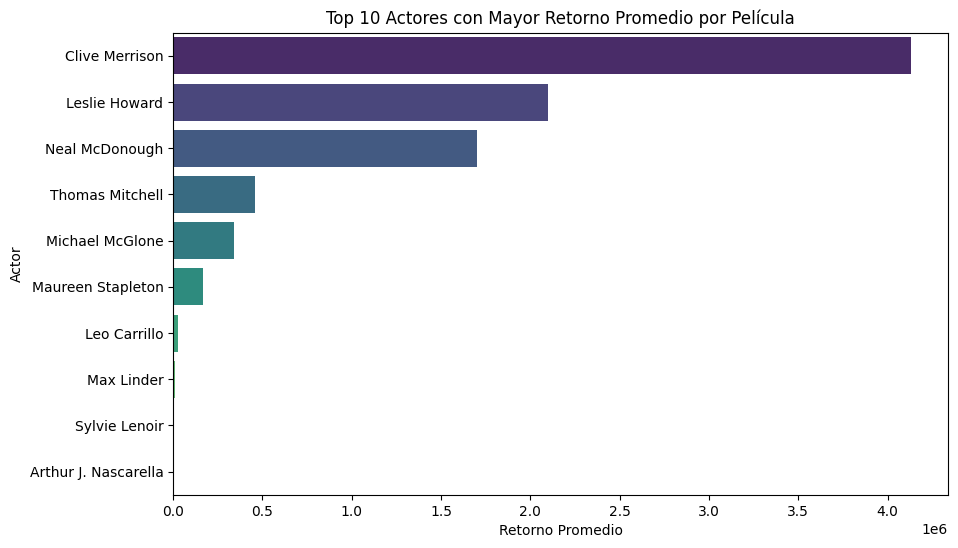

In [35]:
# Crear un gráfico de barras de los actores con mayor retorno promedio
plt.figure(figsize=(10, 6))
sns.barplot(x='return', y='NameActor', data=top_actors, palette='viridis')
plt.title('Top 10 Actores con Mayor Retorno Promedio por Película')
plt.xlabel('Retorno Promedio')
plt.ylabel('Actor')
plt.show()

In [ ]:
hacer correlacion de variables     ojo 

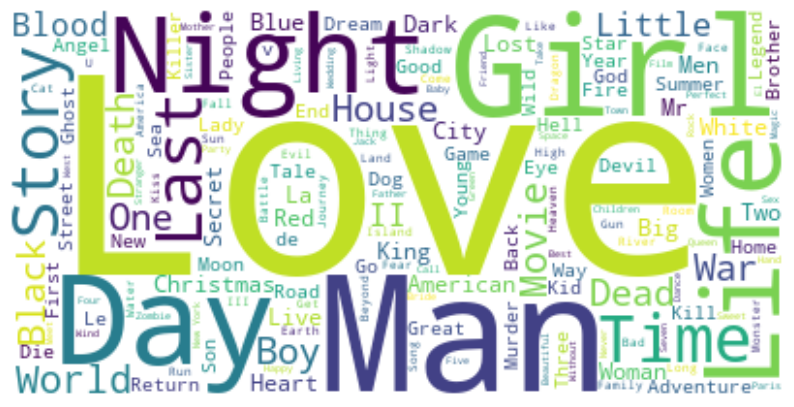

In [16]:
# Preparar los datos
titles = df['title'].dropna().tolist()
text = ' '.join(titles)

# Generar la nube de palabras
stop_words = set(stopwords.words('english'))
wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Modelo de recomendacion de peliculas

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Suponiendo que el DataFrame tiene una columna 'description' con descripciones de películas
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['overview'].fillna(''))

def recomendar_peliculas(titulo_pelicula, num_recomendaciones=5):
    # Obtener el índice de la película
    idx = df[df['title'] == titulo_pelicula].index[0]
    
    # Calcular la similitud con todas las demás películas
    cosine_similarities = cosine_similarity(tfidf_matrix[idx:idx+1], tfidf_matrix).flatten()
    
    # Obtener los índices de las películas más similares
    similar_indices = cosine_similarities.argsort()[-num_recomendaciones-1:-1]
    
    # Obtener los nombres de las películas más similares
    similar_movies = df.iloc[similar_indices]['title'].tolist()
    return similar_movies

# Ejemplo de uso
print(recomendar_peliculas('Toy Story'))


["Andy Hardy's Blonde Trouble", 'Small Fry', 'The 40 Year Old Virgin', 'Toy Story 2', 'Toy Story 3']
